Ridge Regression

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data  = load_diabetes()

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='disease_progression')

print(x.shape)

(442, 10)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [10]:
ridge = Ridge(alpha=1.0)  # alpha = λ

ridge.fit(X_train_scaled, y_train)



Ridge()

In [11]:
y_pred = ridge.predict(X_test_scaled)


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 2892.014565750171
R2 Score: 0.45414652070698247


In [14]:
coeff_df = pd.DataFrame({
    "Feature": x.columns,
    "Weight": ridge.coef_
}).sort_values(by="Weight", ascending=False)

coeff_df


,Feature,Weight
8,s5,31.378384
2,bmi,25.732699
5,s2,17.053075
3,bp,16.734300
7,s4,11.764260
6,s3,3.369914
9,s6,2.458139
0,age,1.807342
1,sex,-11.448190
4,s1,-34.671954


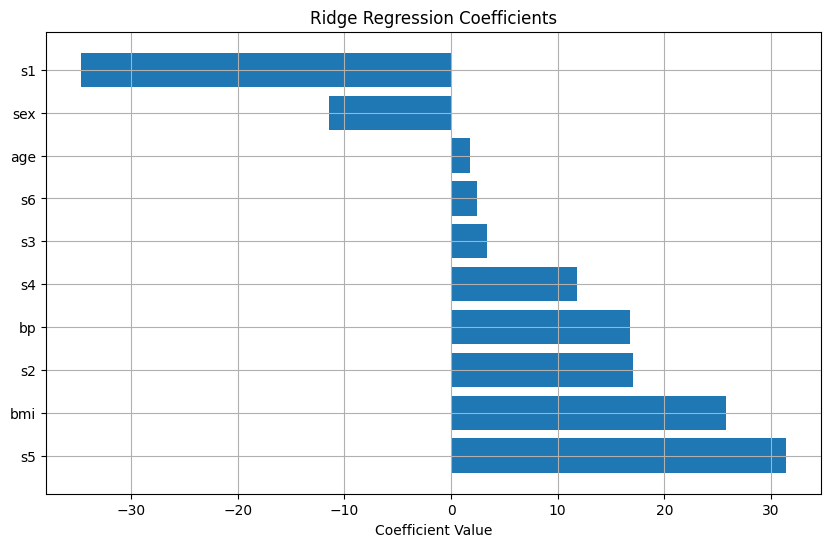

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(coeff_df['Feature'], coeff_df['Weight'])
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.grid(True)
plt.show()